#  Asignacion 1


## Ship's Instruction Manual

In [33]:
import ipywidgets as widgets

ignition = widgets.ToggleButton(
    value=False,
    description='Start Engine',
    button_style='success',
    tooltip='Engage your Engine',
    icon='rocket'
)

output = widgets.Output()

display(ignition, output)

def on_value_change(change):
    with output:
        if change['new'] == True:
            print("engine started!")
        else:   
            print("engine stopped")

ignition.observe(on_value_change, names='value')

ToggleButton(value=False, button_style='success', description='Start Engine', icon='rocket', tooltip='Engage y…

Output()

In [34]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Oxygen levels

Display ten minutes of oxygen levels in your ship.

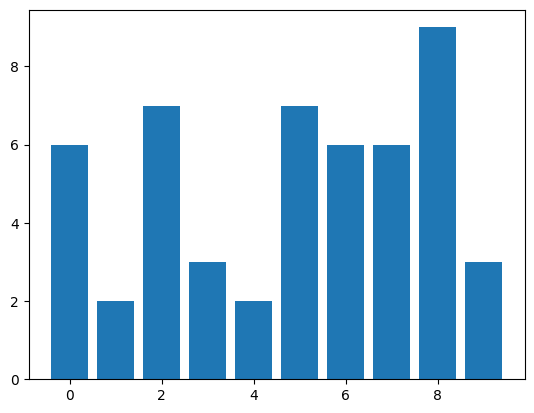

In [36]:
import numpy as np
import matplotlib.pyplot as plt
data = np.random.default_rng(12345)
oxy_nums = data.integers(low=0, high=10, size=10)

plt.bar(range(len(oxy_nums)), oxy_nums)
plt.show()

## Ship's velocity

Show the seconds needed to get from 0 to 60 meters per second, given the ship's acceleration in meters per second.

In [37]:
endVelocity = 60
startVelocity = 0
acceleration = 9.8

time = (endVelocity - startVelocity) / acceleration
print("Time to reach desired velocity = ", time)

Time to reach desired velocity =  6.122448979591836


# Asignacion 2

## Valores Promedios
Declaremos los valores de las variables de la ecuación

In [38]:
F_prom = 50  # libra/pie
L_prom = 30  # pie
E_prom = 1.5 * 10**8  # psi
I_prom = 0.06  # pie^4

## Deltas o Cambios de las variables
Aquí declararemos los deltas de cada variable para calcular la propagación del error

In [39]:
delta_F = 2  # libra/pie
delta_L = 0.1  # pie
delta_E = 0.01 * 10**8  # psi
delta_I = 6 * 10**-4  # pie^4

## Cálculo del promedio
Colocamos la fórmula original y resolvemos la ecuación inicial, para obtener la función "y", y así comparar la respuesta vs el error

In [40]:
y = (F_prom * L_prom**4) / (8 * E_prom * I_prom)

## Derivadas Parciales
declaramos las fórmulas de las derivadas parciales, para su resolución y asi poder proseguir con la fórmula del calculo de delta y

In [41]:
dy_dF = L_prom**4 / (8 * E_prom * I_prom)
dy_dL = (4 * F_prom * L_prom**3) / (8 * E_prom * I_prom)  
dy_dE = - (F_prom * L_prom**4) / (8 * E_prom**2 * I_prom)
dy_dI = - (F_prom * L_prom**4) / (8 * E_prom * I_prom**2)

## Cálculo de Delta "y" o Propagación del error.
Con las derivadas parciales ya encontradas, procedemos a declarar la nueva fórmula de propagación del error y asi finalmente poder encontrar la y aproximada

In [42]:
delta_y = (dy_dF * delta_F) + (dy_dL * delta_L) + (dy_dE * delta_E) + (dy_dI * delta_I)

## Cálculo de error absoluto y relativo
Colocamos las fórmulas ya conocidas de error absoluto y error relativo

In [43]:
error_absoluto = abs(delta_y)
error_relativo = abs(y- delta_y / y) if y != 0 else float('inf')

## Cálculo de error relacionado a operaciones matemáticas
Aquí aplicamos las siguientes ecuaciones para poder calcular el error en cuanto a las operaciones matemáticas, ya que la suma y diferencia usa la misma fórmula y por tanto da la misma respuesta, se mostrara como una respuesta conjunta.

In [44]:
error_suma_resta = y + delta_y 
error_multiplicacion = abs(y) * delta_y + abs(delta_y) * y
error_division = (abs(y) * delta_y + abs(delta_y) * y) / (delta_y**2 if delta_y != 0 else float('inf'))

## Resultados
en esta sección se ponen los "prints", para ver la respuestas que da el código

In [45]:
print(f"y : {y:.6f}")
print(f"Delta y (serie de Taylor): {delta_y:.6f}")
print(f"Error absoluto: {error_absoluto:.6f}")
print(f"Error relativo: {error_relativo:.6f}")  
print("Errores debido a operaciones:")
print(f"Error en la suma/resta de y promedio y delta y: {error_suma_resta:.6f}")
print(f"Error en la multiplicación de y promedio y delta y: {error_multiplicacion:.6f}")
print(f"Error en la división de y promedio y delta y: {error_division:.6f}")

y : 0.562500
Delta y (serie de Taylor): 0.020625
Error absoluto: 0.020625
Error relativo: 0.525833
Errores debido a operaciones:
Error en la suma/resta de y promedio y delta y: 0.583125
Error en la multiplicación de y promedio y delta y: 0.023203
Error en la división de y promedio y delta y: 54.545455


# Asignacion 3

## Método de bisección 

#### Importamos librería, para resolver procesos matemáticos, representar gráficos, importación de widgets para el botón dinámico para escoger los distintos problemas

In [46]:
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

## Definimos nuestra funciones
$F(1)=Ln ((x^2)+1)-(e^(x/2)*cos*((pi)*x)$


$F(2)= 10 *Sen(x)$

In [47]:
# Definimos las funciones f1 y f2
def f1(x):
    return np.log(x**2 + 1) - (np.exp(x / 2) * np.cos(np.pi * x))

def f2(x):
    return 10 * np.sin(x)

## Definimos el método de Bisección y los distintos cálculos que lleva el proceso
Definimos el proceso de cálculo de número de iteraciones. Con la fórmula ya despejada de k y logaritmo base 2.
Subsecuentemente tenemos los valores del rango inicial (a,b)
la tolerancia que nos da el enunciado del problema (tol)
y con esto calculamos el número de iteraciones requeridas

In [48]:
# Método de Bisección
def metodo_biseccion(f, a, b, tol):
    iteraciones = []
    c = a
    iter_count = 0
    c_prev = None
    
    while True:
        c = (a + b) / 2.0

        if c_prev is not None:
            error_abs = abs(c - c_prev)
            error_rel = error_abs / abs(c) if c != 0 else float('inf')
        else:
            error_abs = None
            error_rel = None

        iteraciones.append((iter_count, c, a, b, error_abs, error_rel))
        
        # Condición de parada: si el error es menor que la tolerancia
        if error_abs is not None and error_abs < tol:
            break
        
        if f(c) == 0:  # Si encuentra una raíz exacta, detenerse
            break
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c

        c_prev = c
        iter_count += 1
    
    return c, iter_count, iteraciones

## Para encontrar la raíz utilizando el metodo de bisección 
entonces decimos que raiz, conteo_iteraciones, iteracioneses igual al método de bisección y le asignamos los valores que retornan en 3 variables ya declaradas anteriormente, en el que tenemos que raiz que es el valor encontrado (el punto intermedio del rango), el numero de iteraciones del método de bisección,  y la lista de iteraciones, en cuanto al if que sigue es por si la raiz encontrada encontró una raíz con un valor válido

## Ciclo else para escoger operación
Definimos el ciclo else y definimos parámetros de cada operación 

## Gráficas e impresiones

Aquí definimos la configuración que llevará la grafica y el ciclo for para mostrar los valores de las raíces, error absoluto y error relativo

In [49]:
# Función para ejecutar el método de bisección basado en la fórmula seleccionada
def ejecutar_biseccion(formula):
    output.clear_output()
    with output:
        if formula == 'f1':  # Ln((x^2)+1)-(e^(x/2)*cos(pi*x))
            a = 0.1
            b = 0.5
            tol = 1e-6
            raiz, conteo_iteraciones, iteraciones = metodo_biseccion(f1, a, b, tol)
        else:  # 10*sin(x)
            a = -2
            b = 1
            tol = 1e-4
            raiz, conteo_iteraciones, iteraciones = metodo_biseccion(f2, a, b, tol)
        
        print(f"Raíz aproximada: {raiz:.5f}")
        print(f"Número de iteraciones realizadas: {conteo_iteraciones}")
        
        # Imprimir las iteraciones
        print("\nRaíces aproximadas en cada iteración:")
        for conteo_iter, c, a_val, b_val, error_abs, error_rel in iteraciones:
            error_abs_str = f"{error_abs:.5e}" if error_abs is not None else "N/A"
            error_rel_str = f"{error_rel:.5e}" if error_rel is not None else "N/A"
            print(f"Iteración {conteo_iter}: c = {c:.5f}, Intervalo = [{a_val:.5f}, {b_val:.5f}], Error Absoluto = {error_abs_str}, Error Relativo = {error_rel_str}")
        
        # Graficar la función y las iteraciones
        x = np.linspace(a, b, 400)
        y = f1(x) if formula == 'f1' else f2(x)

        plt.figure(figsize=(10, 6))
        plt.plot(x, y, label='f(x)')
        plt.axhline(0, color='black', lw=0.5)
        plt.title(f'Método de Bisección: {"Ln((x^2)+1)-(e^(x/2)*cos(pi*x))" if formula == "f1" else "10*sin(x)"}')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.grid(True)

        for conteo_iter, c, a_val, b_val, error_abs, error_rel in iteraciones:
            plt.plot(c, f1(c) if formula == 'f1' else f2(c), 'ro')
            plt.text(c, f1(c) if formula == 'f1' else f2(c), f'Iter {conteo_iter}', fontsize=8, ha='right')
        
        plt.show()

# Definir el toggle button
toggle_button = widgets.ToggleButton(
    value=False,
    description='Método de Bisección',
    button_style='success',
    tooltip='Método de Bisección',
    icon='check'
)

# Selección de la fórmula
formula_toggle = widgets.ToggleButtons(
    options=[('Ln((x^2)+1)-(e^(x/2)*cos(pi*x))', 'f1'), ('10*sin(x)', 'f2')],
    value='f1',
    description='Fórmula:'
)

# Salida de los resultados
output = widgets.Output()

# Definir el comportamiento al hacer clic en el botón
def on_button_click(change):
    if change['new']:
        ejecutar_biseccion(formula_toggle.value)

# Vincular la observación del botón
toggle_button.observe(on_button_click, names='value')

# Mostrar los widgets
display(formula_toggle, toggle_button, output)

ToggleButtons(description='Fórmula:', options=(('Ln((x^2)+1)-(e^(x/2)*cos(pi*x))', 'f1'), ('10*sin(x)', 'f2'))…

ToggleButton(value=False, button_style='success', description='Método de Bisección', icon='check', tooltip='Mé…

Output()

# Asignacion 4


## Importamos librerías

In [50]:
import numpy as np
import matplotlib.pyplot as plt

## Definimos funciones
La ecuación f(x)
y la derivada de esta funciones que la llamaremos df(x), para el método de Newton Raphson.

In [51]:
def f(x):
    return np.log(x**2 + 1) - (np.exp(x / 2) * np.cos(np.pi * x))


def df(x):
    return (2*x / (x**2 + 1)) - (0.5 * np.exp(x / 2) * np.cos(np.pi * x)) + (np.exp(x / 2) * np.pi * np.sin(np.pi * x))

## Para el método de Newton Raphson y con sus respectivos gráficos

In [52]:
def mnr(x0, tol, max_iter=1000):
    x_i = x0
    iteraciones = []
    for i in range(max_iter):
        f_xi = f(x_i)
        df_xi = df(x_i)
        x_i1 = x_i - f_xi / df_xi
        error = abs(x_i1 - x_i)
        iteraciones.append(x_i1)
        print(f"Iteración {i+1}: f(x_i) = {f_xi:.6f}, f'(x_i) = {df_xi:.6f}, x_i+1 = {x_i1:.6f}, Error = {error:.6e}")
        if error < tol:
            break
        x_i = x_i1
    return x_i1, iteraciones

## Para el método de la secante con sus respectivos gráficos

In [53]:
def sec(x0, x1, tol, max_iter=1000):
    iteraciones = []
    for i in range(max_iter):
        f_x0 = f(x0)
        f_x1 = f(x1)
        x_n2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        error = abs(x_n2 - x1)
        iteraciones.append(x_n2)
        print(f"Iteración {i+1}: f(x_i) = {f_x1:.6f}, x_i+1 = {x_n2:.6f}, Error = {error:.6e}")
        if error < tol:
            break
        x0 = x1
        x1 = x_n2
    return x_n2, iteraciones

## Parámetros de cada método e impresiones de las respuestas

In [54]:
# Parámetros de Newton Raphson
tol= 1e-6
x0_mnr=0.6


x0_sec = 0.6
x1_sec = 0.65

# Método de Newton Raphson
print("Método de Newton Raphson:")
raiz_mnr, iteraciones_newton = mnr(x0_mnr, tol)
print(f"\nRaíz encontrada por Newton Raphson: {raiz_mnr:.6f}")

# Método de la Secante
print("\nMétodo de la Secante:")
raiz_secante, iteraciones_secante = sec(x0_sec, x1_sec, tol)
print(f"\nRaíz encontrada por la Secante: {raiz_secante:.6f}")

# Graficar la función y las iteraciones
x_vals = np.linspace(-1, 1, 400)
y_vals = f(x_vals)

# Gráfico para Newton-Raphson
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_vals, y_vals, label="f(x)")
plt.axhline(0, color='black', lw=0.5)
plt.title('Método de Newton Raphson')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
for i, xn in enumerate(iteraciones_newton):
    plt.plot(xn, f(xn), 'ro')  # Marca las aproximaciones
    plt.text(xn, f(xn), f'Iter {i+1}', fontsize=8, ha='right')
plt.legend()

# Gráfico para la Secante
plt.subplot(1, 2, 2)
plt.plot(x_vals, y_vals, label="f(x)")
plt.axhline(0, color='black', lw=0.5)
plt.title('Método de la Secante')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
for i, xn in enumerate(iteraciones_secante):
    plt.plot(xn, f(xn), 'bo')  # Marca las aproximaciones
    plt.text(xn, f(xn), f'Iter {i+1}', fontsize=8, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

Método de Newton Raphson:
Iteración 1: f(x_i) = 0.724614, f'(x_i) = 5.124069, x_i+1 = 0.458586, Error = 1.414138e-01
Iteración 2: f(x_i) = 0.027696, f'(x_i) = 4.594038, x_i+1 = 0.452558, Error = 6.028654e-03
Iteración 3: f(x_i) = 0.000121, f'(x_i) = 4.553801, x_i+1 = 0.452531, Error = 2.649038e-05
Iteración 4: f(x_i) = 0.000000, f'(x_i) = 4.553621, x_i+1 = 0.452531, Error = 5.226324e-10

Raíz encontrada por Newton Raphson: 0.452531

Método de la Secante:
Iteración 1: f(x_i) = 0.980753, x_i+1 = 0.458550, Error = 1.914496e-01
Iteración 2: f(x_i) = 0.027531, x_i+1 = 0.453021, Error = 5.529554e-03
Iteración 3: f(x_i) = 0.002231, x_i+1 = 0.452533, Error = 4.876448e-04
Iteración 4: f(x_i) = 0.000010, x_i+1 = 0.452531, Error = 2.159699e-06
Iteración 5: f(x_i) = 0.000000, x_i+1 = 0.452531, Error = 7.872284e-10

Raíz encontrada por la Secante: 0.452531


KeyboardInterrupt: 

# Asignacion 5

#### Newton Raphson Multivariable y Gauss Seidel

## definimos las ecuaciones

### Para calcular valores de $X_1, X_2, X_3$

In [ ]:
import numpy as np


def sistema(valores):
    x1, x2, x3 = valores
    ec1 = x1**2 + 2*x2**2 + np.exp(x1 + x2) - 6.1718 + x1*x3
    ec2 = 10*x2 + x2*x3
    ec3 = np.sin(x1 * x3) + x2**2 - 1.141 + x1
    return np.array([ec1, ec2, ec3])

## Función para calcular el Jacobiano 

## Definimos el Jacobiano y las derivadas parciales de cada ecuacion con respecto a las variables. Y definimos el retorno de la matriz J.

In [ ]:
def jacobiano(valores):
    x1, x2, x3 = valores
    # Derivadas parciales ec1
    df1_dx1 = 2*x1 + x3 + np.exp(x1 + x2)
    df1_dx2 = 4*x2 + np.exp(x1 + x2)
    df1_dx3 = x1

    # Derivadas parciales ec2
    df2_dx1 = 0
    df2_dx2 = 10 + x3
    df2_dx3 = x2

    # Derivadas parciales ec3
    df3_dx1 = x3 * np.cos(x1 * x3) + 1
    df3_dx2 = 2*x2
    df3_dx3 = x1 * np.cos(x1 * x3)
        
    return np.array([[df1_dx1, df1_dx2, df1_dx3],
                     [df2_dx1, df2_dx2, df2_dx3],
                     [df3_dx1, df3_dx2, df3_dx3]])

## Declaramos los parametros del newton raphson multivariable

In [ ]:
def mnrm(raiz, tol=1e-6, max_iter=100):
    valores = np.array(raiz)
    
    print(f"{'Iteración':<10}{'x1':<15}{'x2':<15}{'x3':<15}{'Norma':<15}")
    print("-" * 60)
    
    for iteration in range(max_iter):
        F = sistema(valores)
        J = jacobiano(valores)
        
        
        print(f"Jacobiano en la iteración {iteration+1}:\n{J}\n")
        
        
        delta = np.linalg.solve(J, -F)
        
        
        valores = valores + delta
        
        
        print(f"{iteration + 1:<10}{valores[0]:<15.10f}{valores[1]:<15.10f}{valores[2]:<15.10f}{np.linalg.norm(delta):<15.8f}")
        
        
        if np.linalg.norm(delta) < tol:
            print(f"\nConvergió en {iteration + 1} iteraciones")
            return valores
    
    print("No convergió en el número máximo de iteraciones")
    return valores

### Método de Gauss Seidel

#### Definimos ecuaciones para el sistema

In [ ]:
import numpy as np


A = np.array([[25, 5, 1],
              [64, 8, 1],
              [144, 12, 1]])

# términos independientes
b = np.array([106.8, 177.2, 279.2])


x = np.zeros_like([1,2,5])

# Número máximo de iteraciones
max_iter = 100

# Tolerancia para la convergencia
tol = 1e-6

## Definimos los parametros del Gauss Seidel

In [ ]:
def gs(A, b, x, tol=1e-6, max_iter=100):
    n = len(b)

    print(f'Iteracion inicial: x1 = {x[0]:.5f}, x2 = {x[1]:.5f}, x3 = {x[2]:.5f}')

    for k in range(max_iter):
        x_new = np.copy(x)

        
        x_new[0] = (b[0] - A[0,1]*x[1] - A[0,2]*x[2]) / A[0,0]
        x_new[1] = (b[1] - A[1,0]*x_new[0] - A[1,2]*x[2]) / A[1,1]
        x_new[2] = (b[2] - A[2,0]*x_new[0] - A[2,1]*x_new[1]) / A[2,2]

        
        error_rel = np.abs((x_new - x) / x_new) * 100

        #
        print(f'\nIteración {k+1}:')
        print(f'x1 = {x_new[0]:.5f}, x2 = {x_new[1]:.5f}, x3 = {x_new[2]:.5f}')
        print(f'Error relativo: x1 = {error_rel[0]:.5f}%, x2 = {error_rel[1]:.5f}%, x3 = {error_rel[2]:.5f}%')

        
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            print(f'\nConvergió en {k+1} iteraciones.')
            return x_new

        
        x = x_new

    print('No convergió dentro del número máximo de iteraciones.')
    return x

## En este código quise implementar preguntar al usuario que método usar. Ya que son 2 casos para demostrar

In [ ]:
def main():
    print("Selecciona el método que deseas usar para resolver el sistema de ecuaciones:")
    print("1. Newton Raphson Multivariable")
    print("2. Gauss Seidel")
    opcion = int(input("Introduce 1 o 2: "))

    if opcion == 1:
        raiz = [1, 1, 1]  
        solucion = mnrm(raiz)
        print(f"\nLa solucion final es: x1 = {solucion[0]:.4f}, x2 = {solucion[1]:.4f}, x3 = {solucion[2]:.4f}")

    elif opcion == 2:
        
        A = np.array([[25, 5, 1],
                      [64, 8, 1],
                      [144, 12, 1]])
        b = np.array([106.8, 177.2, 279.2])
        x = np.array([1, 2, 5], dtype=float)  

        solucion = gs(A, b, x)
        print(f"\nLa solucion final es: a1 = {solucion[0]:.4f}, a2 = {solucion[1]:.4f}, a3 = {solucion[2]:.4f}")

    else:
        print("Opción no valida.")

if __name__ == "__main__":
    main()


Selecciona el método que deseas usar para resolver el sistema de ecuaciones:
1. Newton Raphson Multivariable
2. Gauss Seidel
Iteracion inicial: x1 = 1.00000, x2 = 2.00000, x3 = 5.00000

Iteración 1:
x1 = 3.67200, x2 = -7.85100, x3 = -155.35600
Error relativo: x1 = 72.76688%, x2 = 125.47446%, x3 = 103.21841%

Iteración 2:
x1 = 12.05644, x2 = -54.88202, x3 = -798.34312
Error relativo: x1 = 69.54325%, x2 = 85.69477%, x3 = 80.54020%

Iteración 3:
x1 = 47.18213, x2 = -255.51414, x3 = -3448.85686
Error relativo: x1 = 74.44702%, x2 = 78.52095%, x3 = 76.85195%

Iteración 4:
x1 = 193.32910, x2 = -1093.37571, x3 = -14439.68222
Error relativo: x1 = 75.59492%, x2 = 76.63071%, x3 = 76.11542%

Iteración 5:
x1 = 800.53443, x2 = -4577.16517, x3 = -60071.77603
Error relativo: x1 = 75.85000%, x2 = 76.11238%, x3 = 75.96262%

Iteración 6:
x1 = 3322.57608, x2 = -19049.48660, x3 = -249577.91567
Error relativo: x1 = 75.90621%, x2 = 75.97224%, x3 = 75.93065%

Iteración 7:
x1 = 13797.28595, x2 = -79158.89812, 

# Asignacion 6

## Problema 1

In [ ]:
import math


a = 0  
dominio = math.pi / 4  
error_tolerancia = 1e-5


def derivada_cos(n):
    if n % 4 == 0:
        return math.cos  
    elif n % 4 == 1:
        return lambda x: -math.sin(x)  
    elif n % 4 == 2:
        return lambda x: -math.cos(x)  
    else:
        return math.sin  


n = 0  
error_actual = float('inf')

while error_actual > error_tolerancia:
    n += 1
    M = 1  


    residuo = M * (dominio)**(n + 1) / math.factorial(n + 1)
    error_actual = residuo

print(f"El orden mínimo requerido es n = {n} para que el error sea menor a {error_tolerancia}.")

El orden mínimo requerido es n = 7 para que el error sea menor a 1e-05.


## Problema 2

In [ ]:
import math


def f_a(x):
    return 5 / x + x / 2

def f_b(x):
    return 5 / x

def f_c(x):
    return 1 + (x - 1) * x

def f_d(x):
    return 0.5 * (x + 5 / x)


x0 = 2.5  
tolerancia = 1e-4  
iter_max = 100  

def punto_fijo(f, x0, tolerancia, iter_max):
    iteraciones = 0
    error = float('inf')
    xi = x0
    while error > tolerancia and iteraciones < iter_max:
        x_next = f(xi)
        error = abs(x_next - xi)
        xi = x_next
        iteraciones += 1
    return xi, iteraciones, error


funciones = {"a": f_a, "b": f_b, "c": f_c, "d": f_d}
resultados = {}

for etiqueta, funcion in funciones.items():
    raiz, iteraciones, error_final = punto_fijo(funcion, x0, tolerancia, iter_max)
    resultados[etiqueta] = (raiz, iteraciones, error_final)


for etiqueta, (raiz, iteraciones, error_final) in resultados.items():
    print(f"Función {etiqueta}: Raíz aproximada = {raiz}, Iteraciones = {iteraciones}, Error final = {error_final}")


Función a: Raíz aproximada = 3.162277660168387, Iteraciones = 4, Error final = 2.215243881664719e-07
Función b: Raíz aproximada = 2.5, Iteraciones = 100, Error final = 0.5
Función c: Raíz aproximada = inf, Iteraciones = 11, Error final = nan
Función d: Raíz aproximada = 2.2360679779158037, Iteraciones = 3, Error final = 4.31331953074654e-05


## Problema 3

In [ ]:
import math
P = 1
V = 1
n = 1
R_promedio = 8.3143  
delta_R = 0.0012


T = (P * V) / (n * R_promedio)
print(f"La temperatura calculada es T = {T:.4f} K")



La temperatura calculada es T = 0.1203 K


## Problema 4

In [ ]:
def calcular_errores(x_t, x_a):
    
    error_absoluto = abs(x_t - x_a)
    
 
    error_relativo = error_absoluto / abs(x_t)
    
 
    cifras_significativas = 0
    while abs(x_t - x_a) < 0.5 * 10**(-cifras_significativas):
        cifras_significativas += 1
    
    return error_absoluto, error_relativo, cifras_significativas


casos = [
    (2/9, 0.222),  
    (23.494, 23.496),  
    (0.02144, 0.02138), 
    (3.141592653589793, 22/7)  
]


for i, (x_t, x_a) in enumerate(casos, start=1):
    error_absoluto, error_relativo, cifras_significativas = calcular_errores(x_t, x_a)
    print(f"Caso {chr(96 + i)})")
    print(f"  Error absoluto: {error_absoluto:.6f}")
    print(f"  Error relativo: {error_relativo:.6%}")
    print(f"  Cifras significativas: {cifras_significativas}")


Caso a)
  Error absoluto: 0.000222
  Error relativo: 0.100000%
  Cifras significativas: 4
Caso b)
  Error absoluto: 0.002000
  Error relativo: 0.008513%
  Cifras significativas: 3
Caso c)
  Error absoluto: 0.000060
  Error relativo: 0.279851%
  Cifras significativas: 4
Caso d)
  Error absoluto: 0.001264
  Error relativo: 0.040250%
  Cifras significativas: 3


# Asignacion 7

## Importamos librerías y definimos la función y sus derivadas para el proceso de Golden Search.

In [ ]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

### Definimos el método de razon dorada o Golden search, en este código lo he definido por sus iniciales (mrd). Colocamos los parámetros, las formulas para encontrar los puntos y el error absoluto.

##### Por otro lado, para este método se debe colocar un proceso if y else, para que en las distintas iteraciones se cumplan los requisitos, ya que en el caso de que $f1>f2$ entonces $x_2$ se convierte en $x_l$ y $x_1$ pasa a ser $x_2$

##### En cambio, cuando sucede lo contrario $f2>f1$, ntonces $x_1$ se convierte en $x_u$ y $x_2$ pasa a ser $x_1$

In [ ]:
def mrd():
    
    xl = 0.01  
    xu = 4     
    tol = 1e-4  
    rd = (np.sqrt(5) - 1) / 2  

    
    x1 = xl + rd * (xu - xl)
    x2 = xu - rd * (xu - xl)
    f1 = f(x1)
    f2 = f(x2)

    
    def error_abs(xl, xu):
        return abs(xu - xl)

    
    iter_count = 0
        
    print(f"{'# Iter':<10}{'xl':<10}{'x2':<10}{'x1':<10}{'xu':<10}{'f2':<10}{'f1':<10}{'Error abs':<10}")
    while error_abs(xl, xu) > tol:
        iter_count += 1  
        
        if f1 > f2:
            xl = x2
            x2 = x1
            f2 = f1
            x1 = xl + rd * (xu - xl)
            f1 = f(x1)
        else:
            xu = x1
            x1 = x2
            f1 = f2
            x2 = xu - rd * (xu - xl)
            f2 = f(x2)
        
        
        if error_abs(xl, xu) > tol:
            print(f"{iter_count:<10}{xl:<10.4f}{x2:<10.4f}{x1:<10.4f}{xu:<10.4f}{f2:<10.4f}{f1:<10.4f}{error_abs(xl, xu):<10.4f}")

    
    print(f"\nIteraciones finalizadas: {iter_count}")
    print(f"Resultado final: xl: {xl:.6f}, xu: {xu:.6f}, error abs: {error_abs(xl, xu):.6f}")

### Método de Newton

##### Definimos el método de newton, en este código lo he definido por sus iniciales (mn). Colocamos los parámetros, derivadas, las formulas para encontrar los puntos y el error absoluto.

In [ ]:
def f(x):
    return 2 * np.sin(x) - (x**2) / 10

def df_dx(x):
    return 2 * np.cos(x) - x / 5

def d2f_d2x(x):
    return -2 * np.sin(x) - 1 / 5

def mn(x0):
    tol = 1e-4
    max_iter = 100
    x = x0
    print(f"\n{'Iteración':>10} {'x_i':>10} {'f(x_i)':>10} {'f\'(x_i)':>10} {'f\'\'(x_i)':>10} {'x_{i+1}':>10} {'Error':>10}")
    for i in range(max_iter):
        fx = f(x)
        dfdx = df_dx(x)
        d2fd2x = d2f_d2x(x)
        
        
        x_nueva = x - dfdx / d2fd2x
        error_abs = abs(x_nueva - x)
        
        
        print(f"{i+1:>10} {x:>10.5f} {fx:>10.5f} {dfdx:>10.5f} {d2fd2x:>10.5f} {x_nueva:>10.5f} {error_abs:>10.8f}")
        
        
        if error_abs < tol:
            print(f"Convergencia en iteración {i+1}: x = {x_nueva:.5f}")
            return x_nueva
        
        x = x_nueva
    
    print("No hubo convergencia")
    return None

### Para este código he decidido volver a usar el boton toggle, que se usó en la primera asignación y que volví a implementar en la asignación, lo que hace esta función es que mediante selección de la persona se elija que método ejecutar.

##### Anteriormente en el apartado anterior de método de Newton, las $x_0$, no estan definidas, ya que se define en este apartado de botones, en el que se ve como: $mn(0.01)$, $mn(4)$

In [ ]:
toggle_button = widgets.ToggleButton(
    value=False,
    description='Empezar Metodo',
    button_style='success',
    tooltip='Ejecutar metedo seleccionado',
    icon='check'
)

method_toggle = widgets.ToggleButtons(
    options=["Razon Dorada", "Newton"],
    description="Método:",
    disabled=False,
)

output = widgets.Output()

def click_en_boton(cambio):
    if cambio['new']:  
        with output:
            clear_output()  
            if method_toggle.value == "Razon Dorada":
                print("Ejecutando el Metodo de la Razon Dorada:")
                mrd()
            elif method_toggle.value == "Newton":
                print("Ejecutando el Metodo de Newton con x0 = 0.01:")
                mn(0.01)
                print("\nEjecutando el Metodo de Newton con x0 = 4:")
                mn(4)

toggle_button.observe(click_en_boton, names='value')

display(method_toggle, toggle_button, output)

ToggleButtons(description='Método:', options=('Razon Dorada', 'Newton'), value='Razon Dorada')

ToggleButton(value=False, button_style='success', description='Empezar Metodo', icon='check', tooltip='Ejecuta…

Output()

# Asignacion 8

## Importamos librería 
### Definimos matrices y formula para encontrar a.

In [ ]:
import numpy as np


x = np.array([0, 1, 3, 5, 9])  # Horas
y = np.array([1.000, 0.891, 0.708, 0.562, 0.355])  


def a(b, x, y):
    a1 = np.sum(y * np.exp(b * x))
    a2 = np.sum(np.exp(2 * b * x))
    return a1 / a2

### Definimos el metodo de bisección y la función a la que se le aplicará el método

In [ ]:
def funbis(b, x, y):
    A = np.sum(y * x * np.exp(b * x))
    B = np.sum(y * np.exp(b * x))
    C = np.sum(np.exp(2 * b * x))
    D = np.sum(x * np.exp(2 * b * x))
   
    return A - ((B / C) * D)


def biseccion(func, x, y, b_min, b_max, tol=1e-6, max_iter=100):
    iteraciones = 0
    while iteraciones < max_iter:
        b_i2 = (b_min + b_max) / 2
        f_i2 = func(b_i2, x, y)
        a_i2 = a(b_i2, x, y)  
        
        
        print(f"Iteración {iteraciones+1}: punto_medio = {b_i2:.5f}, f_b/2 = {f_i2:.5f}, a_i+1 = {a_i2:.5f}")
        
        if abs(f_i2) < tol:
            return b_i2
        elif func(b_min, x, y) * f_i2 < 0:
            b_max = b_i2
        else:
            b_min = b_i2
        iteraciones += 1
    return b_i2


b_min = -0.3
b_max = -0.1


b_fin = biseccion(funbis, x, y, b_min, b_max)


a_fin = a(b_fin, x, y)

print(f"Valor óptimo de b: {b_fin:.5f}")
print(f"Valor óptimo de a: {a_fin:.5f}")

Iteración 1: punto_medio = -0.20000, f_b/2 = 0.66892, a_i+1 = 1.11682
Iteración 2: punto_medio = -0.15000, f_b/2 = 0.38726, a_i+1 = 1.05665
Iteración 3: punto_medio = -0.12500, f_b/2 = 0.13095, a_i+1 = 1.01737
Iteración 4: punto_medio = -0.11250, f_b/2 = -0.03802, a_i+1 = 0.99503
Iteración 5: punto_medio = -0.11875, f_b/2 = 0.05029, a_i+1 = 1.00643
Iteración 6: punto_medio = -0.11563, f_b/2 = 0.00713, a_i+1 = 1.00079
Iteración 7: punto_medio = -0.11406, f_b/2 = -0.01520, a_i+1 = 0.99793
Iteración 8: punto_medio = -0.11484, f_b/2 = -0.00397, a_i+1 = 0.99936
Iteración 9: punto_medio = -0.11523, f_b/2 = 0.00159, a_i+1 = 1.00008
Iteración 10: punto_medio = -0.11504, f_b/2 = -0.00119, a_i+1 = 0.99972
Iteración 11: punto_medio = -0.11514, f_b/2 = 0.00020, a_i+1 = 0.99990
Iteración 12: punto_medio = -0.11509, f_b/2 = -0.00049, a_i+1 = 0.99981
Iteración 13: punto_medio = -0.11511, f_b/2 = -0.00014, a_i+1 = 0.99986
Iteración 14: punto_medio = -0.11512, f_b/2 = 0.00003, a_i+1 = 0.99988
Iteración

# Asignacion 9

## Linealizacion de datos y método polinomial

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


t = np.array([0, 1, 3, 5, 7, 9])  # Tiempo en horas
y = np.array([1, 0.891, 0.708, 0.562, 0.447, 0.355])  # Valores de sigma
z = np.log(y)  

### Para la transformación de data
#### se convierte la expresión exponencial en logaritmica, para encontrar $z$ y $a_0$

In [ ]:
N = len(t)
sum_xi = np.sum(t)
sum_xi2 = np.sum(t**2)
sum_tz = np.sum(t * z)
sum_z = np.sum(y)


a1 = (N * sum_tz - sum_xi * sum_z) / (N * sum_xi2 - sum_xi**2)
a0 = (sum_z - a1 * sum_xi) / N


A_exp = np.exp(a0)
lambda_exp = a1


fxiexp = A_exp * np.exp(lambda_exp * t)


sr_exp = np.sum((y - fxiexp)**2)

## Modelo Polinomial
### se definen las sumas
### se define la matriz del sistema de ecuaciones, el vector de terminos independientes, como tambien se le pide las solucion de las matrices. Por último calcular el SR y asi determinar que método es mejor para la curva

In [ ]:
# Calcular las sumas necesarias para el sistema de ecuaciones
sum_xi3 = np.sum(t**3)
sum_xi4 = np.sum(t**4)

sum_y = np.sum(y)
sum_t = np.sum(t * y)
sum_t2 = np.sum(t**2 * y)


A = np.array([
    [N, sum_xi, sum_xi2],
    [sum_xi, sum_xi2, sum_xi3],
    [sum_xi2, sum_xi3, sum_xi4]
])


B = np.array([sum_y, sum_t, sum_t2])


a0_poly, a1_poly, a2_poly = np.linalg.solve(A, B)


fxipoli = a0_poly + a1_poly * t + a2_poly * t**2


sr_poly = np.sum((y - fxipoli)**2)

### Tabla de resultados 
### Criterio de comparación para determinar que método es mas eficiente para la curva
### Gráfica


Tabla de Resultados:
 Iteración   t (Tiempo)          y    z = ln(y)   Predicción Exp  Predicción Poly
         1            0      1.000        0.000           22.025            0.997
         2            1      0.891       -0.115           12.287            0.894
         3            3      0.708       -0.345            3.824            0.711
         4            5      0.562       -0.576            1.190            0.561
         5            7      0.447       -0.805            0.370            0.443
         6            9      0.355       -1.036            0.115            0.357
 Sumatoria            -      3.963       -2.878                -                -

Parámetros del modelo exponencial:
A (exp) = 22.0246
lambda (exp) = -0.5836

Parámetros del modelo polinomial:
a0 (poly) = 0.9970
a1 (poly) = -0.1074
a2 (poly) = 0.0040

Suma de los cuadrados de los residuos (SR):
Modelo exponencial: SR = 5.8208e+02
Modelo polinomial: SR = 4.8563e-05
El modelo polinomial proporciona un 

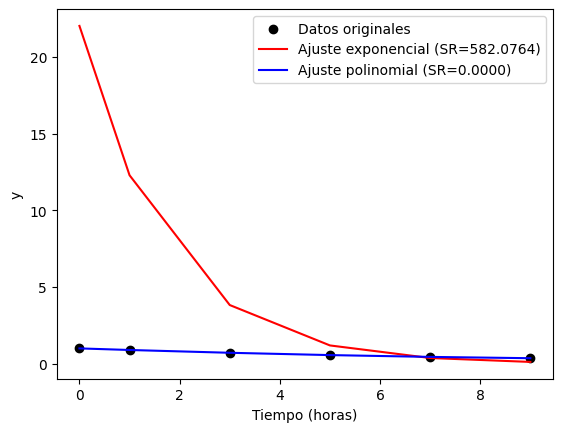

In [ ]:
def imprimir_tabla():
    print(f"{'Iteración':>10} {'t (Tiempo)':>12} {'y':>10} {'z = ln(y)':>12} {'Predicción Exp':>16} {'Predicción Poly':>16}")
    for i in range(N):
        print(f"{i + 1:>10} {t[i]:>12} {y[i]:>10.3f} {z[i]:>12.3f} {fxiexp[i]:>16.3f} {fxipoli[i]:>16.3f}")
    print(f"{'Sumatoria':>10} {'-':>12} {np.sum(y):>10.3f} {np.sum(z):>12.3f} {'-':>16} {'-':>16}")

print("\nTabla de Resultados:")
imprimir_tabla()

print("\nParámetros del modelo exponencial:")
print(f"A (exp) = {A_exp:.4f}")
print(f"lambda (exp) = {lambda_exp:.4f}")

print("\nParámetros del modelo polinomial:")
print(f"a0 (poly) = {a0_poly:.4f}")
print(f"a1 (poly) = {a1_poly:.4f}")
print(f"a2 (poly) = {a2_poly:.4f}")

print("\nSuma de los cuadrados de los residuos (SR):")
print(f"Modelo exponencial: SR = {sr_exp:.4e}")
print(f"Modelo polinomial: SR = {sr_poly:.4e}")
if sr_exp < sr_poly:
    print("El modelo exponencial proporciona un mejor ajuste.")
else:
    print("El modelo polinomial proporciona un mejor ajuste.")

# Gráfica de los modelos
plt.scatter(t, y, label="Datos originales", color="black")
plt.plot(t, fxiexp, label=f"Ajuste exponencial (SR={sr_exp:.4f})", color="red")
plt.plot(t, fxipoli, label=f"Ajuste polinomial (SR={sr_poly:.4f})", color="blue")
plt.xlabel("Tiempo (horas)")
plt.ylabel("y")
plt.legend()
plt.show()

# Asignacion 10

### Para este problema lo hice como un problema de serie:

En el que solo se considera en cuenta el delta t inicial de 1 s y 2 s, respectivamente. Observando la tabla se infiere que se comporta de una sola manera reduciendose a la mitad en el tiempo como en su error. por lo tanto, si se quiere alcanzar un error menor de 0.1% entonces, propongo que: 

$ϵ_a= 0.1$                          

$ϵ_a= E_1 (1/2)^n$     -------------------------------->    $(1)$

$ϵ_a$ es el error solicitado o deseado

$E_1$ es el error inicial

De la ecuacion 1 despejamos la n, para encontrar la cantidad de veces en que se reduce el delta t.

nos quedaría como: 

$n= log(ϵ_a/E_1)/log(1/2)$ ----------------------------->   $(2)$

In [ ]:
import math


error_inicial = 1.2792  
error_deseado = 0.01  
factor_reduccion = 1 / 2  
delta_t_inicial = 1 


n = math.log(error_deseado / error_inicial) / math.log(factor_reduccion)
n = math.ceil(n)  


delta_t_final = factor_reduccion**n


print(f"Número de iteraciones necesarias (n): {n}")
print(f"Nuevo Δt: {delta_t_final:.6f}")


Número de iteraciones necesarias (n): 7
Nuevo Δt: 0.007812


# Asignacion 11

Método de Euler
t       x1       x2
0.00   1.5000   0.0000
0.10   1.5000   -0.6000
0.20   1.4400   -1.0800
0.30   1.3320   -1.4400
0.40   1.1880   -1.6848
0.50   1.0195   -1.8230
0.60   0.8372   -1.8662
0.70   0.6506   -1.8279
0.80   0.4678   -1.7225
0.90   0.2956   -1.5652
1.00   0.1390   -1.3703

Método RK4
t       x1       x2
0.00   1.5000   0.0000
0.10   1.4720   -0.5402
0.20   1.3959   -0.9630
0.30   1.2831   -1.2743
0.40   1.1445   -1.4831
0.50   0.9896   -1.6006
0.60   0.8270   -1.6388
0.70   0.6640   -1.6110
0.80   0.5066   -1.5299
0.90   0.3594   -1.4083
1.00   0.2259   -1.2579


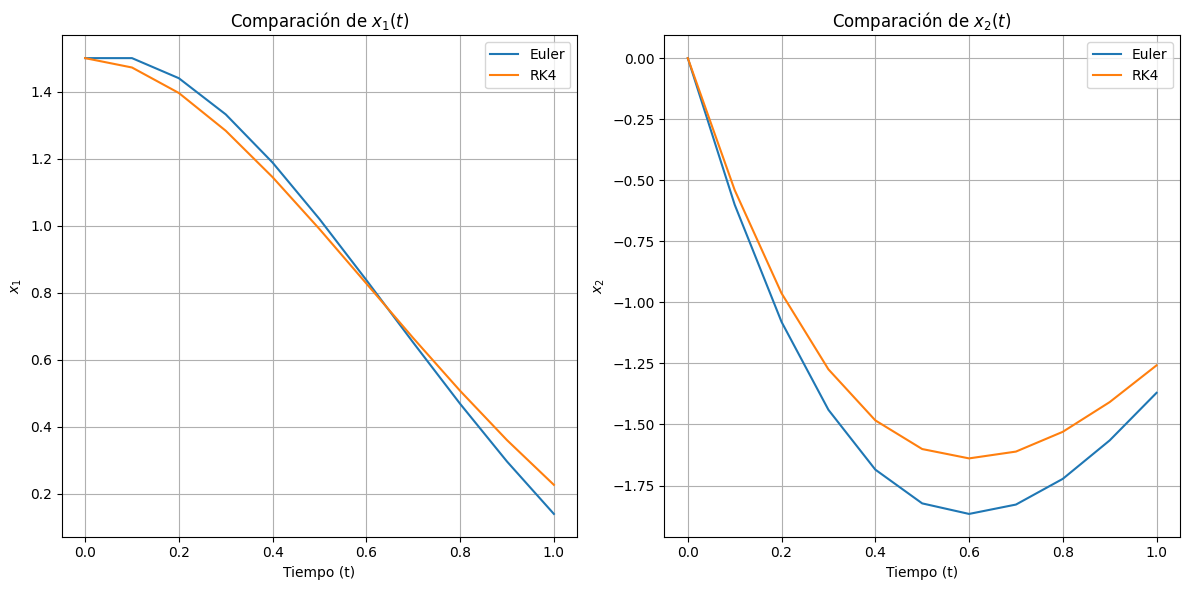

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def sistema(t, x1, x2):
    dx1_dt = x2
    dx2_dt = -2 * x2 - 4 * x1
    return dx1_dt, dx2_dt

def euler(h, t_max):
    t_values = np.arange(0, t_max + h, h)
    x1_values = np.zeros_like(t_values)
    x2_values = np.zeros_like(t_values)
    

    x1_values[0] = 1.5
    x2_values[0] = 0

    print("Método de Euler")
    print("t       x1       x2")
    print(f"{0:.2f}   {x1_values[0]:.4f}   {x2_values[0]:.4f}")

    for i in range(1, len(t_values)):
        dx1, dx2 = sistema(t_values[i - 1], x1_values[i - 1], x2_values[i - 1])
        x1_values[i] = x1_values[i - 1] + h * dx1
        x2_values[i] = x2_values[i - 1] + h * dx2
        print(f"{t_values[i]:.2f}   {x1_values[i]:.4f}   {x2_values[i]:.4f}")
    
    return t_values, x1_values, x2_values


def rk4(h, t_max):
    t_values = np.arange(0, t_max + h, h)
    x1_values = np.zeros_like(t_values)
    x2_values = np.zeros_like(t_values)
    
 
    x1_values[0] = 1.5
    x2_values[0] = 0

    print("\nMétodo RK4")
    print("t       x1       x2")
    print(f"{0:.2f}   {x1_values[0]:.4f}   {x2_values[0]:.4f}")

    for i in range(1, len(t_values)):
        t = t_values[i - 1]
        x1 = x1_values[i - 1]
        x2 = x2_values[i - 1]
        
        k1_x1, k1_x2 = sistema(t, x1, x2)
        k2_x1, k2_x2 = sistema(t + h / 2, x1 + h / 2 * k1_x1, x2 + h / 2 * k1_x2)
        k3_x1, k3_x2 = sistema(t + h / 2, x1 + h / 2 * k2_x1, x2 + h / 2 * k2_x2)
        k4_x1, k4_x2 = sistema(t + h, x1 + h * k3_x1, x2 + h * k3_x2)
        
        x1_values[i] = x1 + h / 6 * (k1_x1 + 2 * k2_x1 + 2 * k3_x1 + k4_x1)
        x2_values[i] = x2 + h / 6 * (k1_x2 + 2 * k2_x2 + 2 * k3_x2 + k4_x2)
        print(f"{t_values[i]:.2f}   {x1_values[i]:.4f}   {x2_values[i]:.4f}")
    
    return t_values, x1_values, x2_values


h = 0.1
t_max = 1.0


t_euler, x1_euler, x2_euler = euler(h, t_max)
t_rk4, x1_rk4, x2_rk4 = rk4(h, t_max)


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(t_euler, x1_euler, label='Euler')
plt.plot(t_rk4, x1_rk4, label='RK4')
plt.title('Comparación de $x_1(t)$')
plt.xlabel('Tiempo (t)')
plt.ylabel('$x_1$')
plt.legend()
plt.grid()


plt.subplot(1, 2, 2)
plt.plot(t_euler, x2_euler, label='Euler')
plt.plot(t_rk4, x2_rk4, label='RK4')
plt.title('Comparación de $x_2(t)$')
plt.xlabel('Tiempo (t)')
plt.ylabel('$x_2$')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Tareas Morales


## Método de punto fijo

In [60]:
import math

def f(x):
    return 10 * math.sin(x)

def g(x):
    
    return x - f(x) / 10  

def punto_fijo(g, x0, tol=1e-6, max_iter=100):
    iteraciones = []
    x_prev = x0
    for i in range(max_iter):
        x_next = g(x_prev)
        error_abs = abs(x_next - x_prev)
        error_rel = error_abs / abs(x_next) if x_next != 0 else None

     
        iteraciones.append((i + 1, x_next, x_prev, error_abs, error_rel))
        
   
        error_rel_str = f"{error_rel:.6e}" if error_rel is not None else "N/A"
        print(f"Iteración {i + 1}: x = {x_next:.6f}, Error Absoluto = {error_abs:.6e}, Error Relativo = {error_rel_str}")
        
        if error_abs < tol: 
            return x_next, iteraciones
        
        x_prev = x_next
    
    raise ValueError("El método no convergió en el número máximo de iteraciones")


x0 = -2  
tol = 1e-6  
max_iter = 100  


raiz, iteraciones = punto_fijo(g, x0, tol, max_iter)


print(f"\nLa raíz aproximada es: {raiz:.6f}")
print("\nDetalles de cada iteración:")
for i, x_next, x_prev, error_abs, error_rel in iteraciones:
    error_abs_str = f"{error_abs:.5e}" if error_abs is not None else "N/A"
    error_rel_str = f"{error_rel:.5e}" if error_rel is not None else "N/A"
    print(f"Iteración {i}: x = {x_next:.6f}, Error Absoluto = {error_abs_str}, Error Relativo = {error_rel_str}")


Iteración 1: x = -1.090703, Error Absoluto = 9.092974e-01, Error Relativo = 8.336805e-01
Iteración 2: x = -0.203751, Error Absoluto = 8.869516e-01, Error Relativo = 4.353117e+00
Iteración 3: x = -0.001407, Error Absoluto = 2.023441e-01, Error Relativo = 1.438283e+02
Iteración 4: x = -0.000000, Error Absoluto = 1.406844e-03, Error Relativo = 3.031509e+06
Iteración 5: x = 0.000000, Error Absoluto = 4.640739e-10, Error Relativo = N/A

La raíz aproximada es: 0.000000

Detalles de cada iteración:
Iteración 1: x = -1.090703, Error Absoluto = 9.09297e-01, Error Relativo = 8.33680e-01
Iteración 2: x = -0.203751, Error Absoluto = 8.86952e-01, Error Relativo = 4.35312e+00
Iteración 3: x = -0.001407, Error Absoluto = 2.02344e-01, Error Relativo = 1.43828e+02
Iteración 4: x = -0.000000, Error Absoluto = 1.40684e-03, Error Relativo = 3.03151e+06
Iteración 5: x = 0.000000, Error Absoluto = 4.64074e-10, Error Relativo = N/A


## Matrices (la inversa de una matriz)

In [ ]:
import numpy as np


L = np.array([
    [1, 0, 0],
    [2.56, 1, 0],
    [5.76, 3.5, 1]
])

U = np.array([
    [25, 5, 1],
    [0, -4.8, -1.56],
    [0, 0, 0.7]
])


def calcular_inversa(matriz, nombre):
    if matriz.shape[0] != matriz.shape[1]:
        print(f"La matriz {nombre} no es cuadrada, no se puede calcular la inversa.")
        return None
    try:
        inversa = np.linalg.inv(matriz)
        print(f"Inversa de la matriz {nombre}:")
        print(inversa)
        return inversa
    except np.linalg.LinAlgError:
        print(f"La matriz {nombre} no es invertible.")
        return None


inversa_L = calcular_inversa(L, "L")
inversa_U = calcular_inversa(U, "U")


Inversa de la matriz L:
[[ 1.00000000e+00  0.00000000e+00 -1.07938350e-17]
 [-2.56000000e+00  1.00000000e+00 -4.56777473e-17]
 [ 3.20000000e+00 -3.50000000e+00  1.00000000e+00]]
Inversa de la matriz U:
[[ 0.04        0.04166667  0.03571429]
 [-0.         -0.20833333 -0.46428571]
 [ 0.          0.          1.42857143]]
